In [6]:
import math

def basic_sigmod(x):
    v = 1/(1+1/math.exp(x))
    return v


In [7]:
basic_sigmod(3)

0.9525741268224334

In [8]:
x = [1,2,3]
basic_sigmod(x)

TypeError: must be real number, not list

In [9]:
import numpy as np

x = np.array([1,2,3])
print(np.exp(x))

[ 2.71828183  7.3890561  20.08553692]


In [10]:
def sigmod(x):
    s = 1.0/(1+1/np.exp(x))
    return s
x = [1,2,3]
sigmod(x)

array([0.73105858, 0.88079708, 0.95257413])

In [11]:
def sigmoid_derivative(x):
    s = 1/(1+1/np.exp(x))
    ds = s*(1-s)
    return ds
x = np.array([1,2,3])
print(sigmoid_derivative(x))

[0.19661193 0.10499359 0.04517666]


In [12]:
def image2vector(image):
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2], 1))
    return v
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print(image2vector(image))

[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


In [13]:
def normalizRows(x):
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    x = x/x_norm
    return x
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print(normalizRows(x))

[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


In [14]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x, axis=1, keepdims=True)
    s = x_exp/x_sum
    return s

x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print('softmax(x)='+str(softmax(x)))

softmax(x)=[[5.06442745e+02 4.61816006e-01 9.27582244e+00 6.25000000e-02
  6.25000000e-02]
 [9.13860965e+01 1.23677633e+01 8.33333333e-02 8.33333333e-02
  8.33333333e-02]]


In [15]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")


dot = 278
 ----- Computation time = 0.0ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 ---

In [16]:
def L1(yhat, y):
    loss = np.sum(np.abs(y-yhat))
    return loss
yhat = np.array([0.9,0.2,0.1,0.4,0.9])
y = np.array([1,0,0,1,1])

In [17]:
print(L1(yhat,y))

1.1


In [18]:
def L2(yhat,y):
    loss = np.sum(np.dot((y-yhat), (y-yhat)))
    return loss
print(L2(yhat,y))

0.43


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

% matplotlib inline


UsageError: Line magic function `%` not found.


In [85]:
# Loading the data (cat/non-cat)

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()



y = [0], it's a 'non-cat' picture.


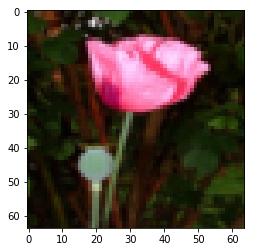

In [86]:
index = 30
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


In [87]:
m_train = train_set_x_orig.shape[0]

m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [88]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b


In [89]:
dim = 2
w, b = initialize_with_zeros(dim)
print(w, b)

[[0.]
 [0.]] 0


In [90]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b )
    cost = -(1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-Y))
    
    dw = 1.0/m*np.dot(X,(A-Y).T)
    db = 1.0/m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
            'db':db}
    
    return grads, cost


In [91]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = nan


C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [92]:
def optimize(w,b,X,Y,num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
            
        if print_cost and i%100 == 0:
            print('Cost after iteration %i : %f' %(i, cost))
    
    params = {
        'w':w,
        'b':b
    }
    
    grads = {
        'dw':dw,
        'db':db
    }
    return params, grads, cost

In [93]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [94]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i%100 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
        param = {'w': w,
                 'b': b
                }
        grads = {'dw' : dw,
                'db' : db
                }
        return params, grads, costs

In [95]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False)

print('w = '+str(params['w']))
print('b ='+ str(params['b']))
print('dw = ' + str(params['dw']))
print('db = ' + str(params['db']))


w = [[0.19033591]
 [0.12259159]]
b =1.9253598300845747


C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


KeyError: 'dw'

In [96]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T ,X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [97]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.0, -1.1, -3.2],[1.2, 2.0, 0.1]])
print("prediction=" + str(predict(w, b, X)))

prediction=[[1. 1. 0.]]


In [98]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_test = predict(w, b, X_train)
    
    print('train accuracy:{}%'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('test accuracy:{}%'.format(100 - np.mean(np.abs(Y_predict_train - Y_test))*100))
    
    d = {
        'cost': costs,
        'Y_prediction_test': Y_prediction_test,
        'Y_prediction_train': Y_prediction_tarin,
        'w': w,
        'b': b,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations
    }
    return d


In [101]:
d = model(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

ValueError: shapes (1,209) and (209,64,64,3) not aligned: 209 (dim 1) != 64 (dim 2)